In [1]:
import os
import pandas as pd
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

In [2]:
# Import train/test data
data_dir = '../data/processed/ALOI/iter1'
X_train = pd.read_csv(os.path.join(data_dir, 'X_train.csv'))
y_train = pd.read_csv(os.path.join(data_dir, 'y_train.csv'))
X_test = pd.read_csv(os.path.join(data_dir, 'X_test.csv'))
y_test = pd.read_csv(os.path.join(data_dir, 'y_test.csv'))

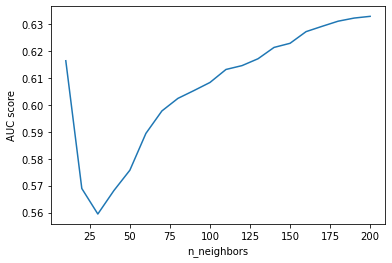

In [31]:
# Algorithm 1
from pyod.models.lof import LOF
#
# Hyperpameters
n_neighbors = list(range(10,201,10))
auc_scores_1 = []
# loop
for n in n_neighbors:
    # Model
    clf1 = LOF(n_neighbors=n)
    # Training
    clf1.fit(X_train)
    # get the anomaly scores on the test data
    y_test_scores = clf1.decision_function(X_test)  # outlier scores
    auc_scores_1.append(roc_auc_score(y_test, y_test_scores))
plt.plot(n_neighbors, auc_scores_1)
plt.xlabel('n_neighbors')
plt.ylabel('AUC score')
plt.show()

Text(33.0, 0.5, 'n_estimators')

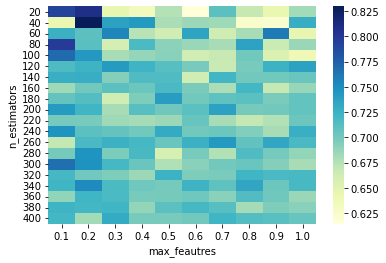

In [35]:
# Algorithm 2
from pyod.models.iforest import IForest
#
n_estimators= list(range(20,401,20))
max_features = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
auc_scores_2 = [] # scores list
# loop
for n in n_estimators:
    # Temp scores
    temp_scores = []
    for m in max_features:
        # Model
        clf2 = IForest(n_estimators=n, max_features=m)
        # Training
        clf2.fit(X_train)
        # get the anomaly scores on the test data
        y_test_scores = clf2.decision_function(X_test)  # outlier scores
        temp_scores.append(roc_auc_score(y_test, y_test_scores))
    auc_scores_2.append(temp_scores)
# Plot heatmap
auc_scores_2_df = pd.DataFrame(auc_scores_2, index=n_estimators, columns=max_features)
ax = sns.heatmap(auc_scores_2_df, cmap="YlGnBu")
ax.set_xlabel('max_feautres')
ax.set_ylabel('n_estimators')